In [17]:
import copy
import json
import logging
import pickle
import time
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
def load_most_indexes(filename):
        save_dir = os.path.join(os.getcwd(), f"indexes_results/{filename}")
        with open(os.path.join(save_dir, save_dir), "rb") as file:
            indexes = list(pickle.load(file))

        return indexes

# Create budget plots

In [27]:
indexes = load_most_indexes("epinions.pickle")
print(indexes[0])

['relaxation', {'budget_MB': 5000, 'max_indexes': 10, 'max_index_width': 2, 'allowed_transformations': ['splitting', 'merging', 'prefixing', 'removal']}, 121115.73000000475, [I(C review.u_id,C review.rating), I(C review.i_id,C review.creation_date), I(C item.i_id), I(C trust.target_u_id,C trust.source_u_id), I(C useracct.u_id), I(C trust.source_u_id,C trust.target_u_id), I(C useracct.u_id,C useracct.name), I(C review.i_id,C review.rating), I(C trust.source_u_id), I(C item.i_id,C item.title), I(C review.u_id,C review.creation_date), I(C review.i_id,C review.u_id), I(C review.i_id), I(C review.rating,C review.creation_date)], 17.01, 3684.1292939500872]


In [28]:
indexes = [[a, b["budget_MB"], c, d, e, f] for a, b, c, d, e, f in indexes]

In [29]:
df = pd.DataFrame(indexes, columns=["algo_name", "params", "cost", "indexes", "calc_time", "goodput"])
df.head(20)

,algo_name,params,cost,indexes,calc_time,goodput
0,relaxation,5000,121115.73,"[I(C review.u_id,C review.rating), I(C review....",17.01,3684.129294
1,relaxation,10000,135822.26,"[I(C review.i_id,C review.u_id), I(C review.u_...",17.29,3564.119545
2,relaxation,20000,135639.26,"[I(C review.i_id), I(C review.i_id,C review.u_...",16.49,3578.630754
3,relaxation,50000,133475.98,"[I(C trust.source_u_id,C trust.target_u_id), I...",16.50,3588.457490
4,relaxation,80000,134220.77,"[I(C review.i_id,C review.rating), I(C review....",17.18,3573.882679
5,extend,5000,134778.84,"[I(C useracct.u_id), I(C item.i_id), I(C trust...",63.68,3571.958555
6,extend,10000,136035.93,"[I(C useracct.u_id), I(C item.i_id), I(C trust...",64.51,3540.737341
7,extend,20000,140392.34,"[I(C item.i_id), I(C useracct.u_id), I(C trust...",73.88,3620.872419
8,extend,50000,135821.65,"[I(C item.i_id), I(C useracct.u_id), I(C trust...",65.27,3582.223160
9,extend,80000,141637.13,"[I(C item.i_id), I(C useracct.u_id), I(C trust...",66.62,3422.414428


In [35]:
df[["cost", "calc_time", "goodput"]] = df[["cost", "calc_time", "goodput"]].transform(lambda x: (x - x.mean()) / x.std())
df.head(20)

,algo_name,params,cost,indexes,calc_time,goodput
0,relaxation,5000,-2.970640,"[I(C review.u_id,C review.rating), I(C review....",-0.763709,0.391924
1,relaxation,10000,0.167505,"[I(C review.i_id,C review.u_id), I(C review.u_...",-0.750728,0.245077
2,relaxation,20000,0.128456,"[I(C review.i_id), I(C review.i_id,C review.u_...",-0.787818,0.262833
3,relaxation,50000,-0.333154,"[I(C trust.source_u_id,C trust.target_u_id), I...",-0.787354,0.274858
4,relaxation,80000,-0.174228,"[I(C review.i_id,C review.rating), I(C review....",-0.755828,0.257024
5,extend,5000,-0.055144,"[I(C useracct.u_id), I(C item.i_id), I(C trust...",1.400020,0.254669
6,extend,10000,0.213099,"[I(C useracct.u_id), I(C item.i_id), I(C trust...",1.438500,0.216466
7,extend,20000,1.142690,"[I(C item.i_id), I(C useracct.u_id), I(C trust...",1.872915,0.314521
8,extend,50000,0.167375,"[I(C item.i_id), I(C useracct.u_id), I(C trust...",1.473736,0.267229
9,extend,80000,1.408309,"[I(C item.i_id), I(C useracct.u_id), I(C trust...",1.536325,0.071684


algo_name
db2advis      AxesSubplot(0.125,0.125;0.775x0.755)
extend        AxesSubplot(0.125,0.125;0.775x0.755)
relaxation    AxesSubplot(0.125,0.125;0.775x0.755)
Name: goodput, dtype: object

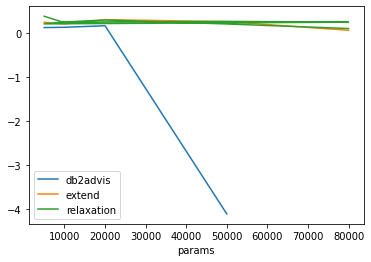

In [36]:
df2 = df.set_index('params')
df2.groupby('algo_name')["goodput"].plot(legend=True)

algo_name
db2advis      AxesSubplot(0.125,0.125;0.775x0.755)
extend        AxesSubplot(0.125,0.125;0.775x0.755)
relaxation    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

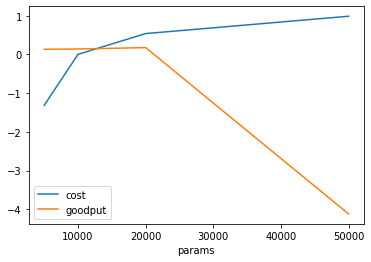

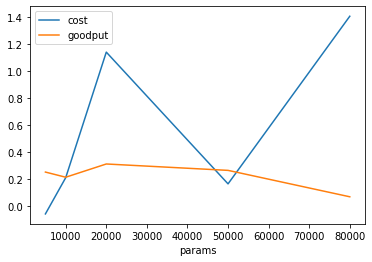

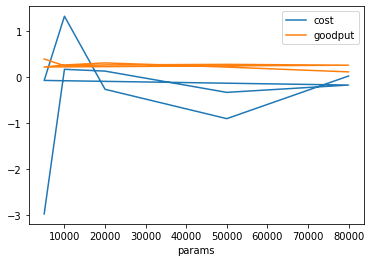

In [37]:
df2 = df.set_index('params')
df2.groupby('algo_name')[["cost", "goodput"]].plot(legend=True)